<a href="https://colab.research.google.com/github/fehmidataj27-dotcom/DeveloperHub-Internship/blob/main/Predict_Future_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2600327133.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Mean Squared Error: 75.4783499607452
R2 Score: 0.7533289101567097


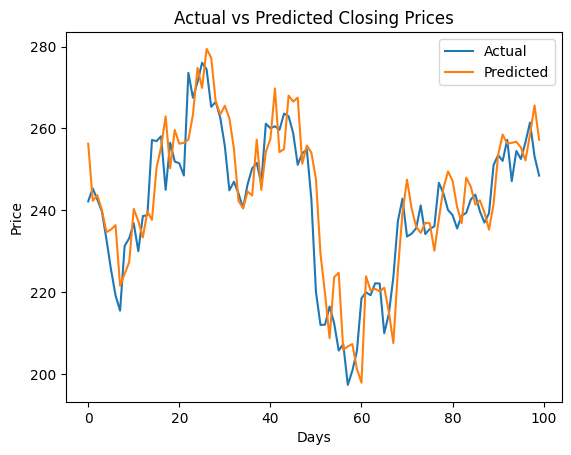

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

stock = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

data = stock[['Open', 'High', 'Low', 'Volume', 'Close']].copy()
data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)

X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure()
plt.plot(y_test.values)
plt.plot(predictions)
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend(["Actual", "Predicted"])
plt.show()